In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV as logCV
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score,auc
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import RobustScaler

In [2]:
df_original = pd.read_csv('online_shoppers_intention.csv')
feature_names = df_original.columns.tolist()
df = df_original.copy()

Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

Administrative - 浏览行政网页数

Administrative_Duration - 浏览行政类网页总时长

Informational - 浏览信息类网页数

Informational_Duration - 浏览信息类网页总时长

ProductRelated - 浏览产品类网页数

ProductRelated_Duration - 浏览产品类网页总时长

BounceRates - 进入无交互百分比 (可能误点)

ExitRates - 特定页面退出百分比

PageValues - （待定）

SpecialDay - 浏览日离下一个节日的

***Month - 浏览行为发生的月份

OperatingSystems - 操作系统（8个类型）

Browser - 浏览器（13个类型）

Region - 地区（9个地区）

TrafficType - 卡顿情况（20种）

***VisitorType - 用户类型（三种）

***Weekend - 是否周末浏览

***Revenue - 是否完成购买

In [3]:
df_original.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df_original.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Data Encoding for Month and VisitorType

In [6]:
def encode_df(df):
    """
    Transfer All non-numi data into num.
    Month, VisitorType, Weekend, Revenue
    Data Missing January and April
    """
    df_encoded = df.copy()
    month_to_code = {
        'January': 1,
        'Feb': 2,
        'Mar': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }
    # One hot encode
    df_encoded = pd.get_dummies(df_encoded, prefix='VisitorType', columns=['VisitorType'])
    # 使用map函数将月份列编码为1到12
    df_encoded['Month'] = df_encoded['Month'].map(month_to_code)
    df_encoded['Weekend'] = df_encoded['Weekend'].astype(int)
    df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)
    return df_encoded
df_encoded = encode_df(df)

In [7]:
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [8]:
df_encoded.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Abnormal Rows

In [9]:
abnormal_rows = df_encoded[((df_encoded['Administrative'] == 0) & (df_encoded["Administrative_Duration"] != 0))\
                           |((df_encoded['Administrative'] != 0) & (df_encoded["Administrative_Duration"] == 0))\
                            |((df_encoded['Informational'] == 0) & (df_encoded["Informational_Duration"] != 0))\
                                |((df_encoded['Informational'] != 0) & (df_encoded["Informational_Duration"] == 0))\
                                    |((df_encoded['ProductRelated'] == 0) & (df_encoded["ProductRelated_Duration"] != 0))\
                                        |((df_encoded['ProductRelated'] != 0) & (df_encoded["ProductRelated_Duration"] == 0))]
abnormal_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,0,0,0,0,1
2,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,0,0,0,0,1
6,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,0,0,0,0,1
7,1,0.0,0,0.00,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,0,0,0,1
16,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,4,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12257,0,0.0,1,0.00,22,812.300000,0.030849,0.057391,0.0,0.0,11,1,1,4,10,1,0,0,0,1
12301,0,0.0,0,0.00,2,0.000000,0.200000,0.200000,0.0,0.0,11,1,1,4,1,0,0,0,0,1
12311,1,0.0,2,211.25,144,4627.489571,0.001361,0.020664,0.0,0.0,11,2,2,1,2,0,1,0,0,1
12321,0,0.0,0,0.00,6,0.000000,0.200000,0.200000,0.0,0.0,11,1,8,4,1,0,0,0,0,1


In [10]:
def remove_abnormal_rows(df):
    abnormal_rows = df_encoded[((df_encoded['Administrative'] == 0) & (df_encoded["Administrative_Duration"] != 0))\
                           |((df_encoded['Administrative'] != 0) & (df_encoded["Administrative_Duration"] == 0))\
                            |((df_encoded['Informational'] == 0) & (df_encoded["Informational_Duration"] != 0))\
                                |((df_encoded['Informational'] != 0) & (df_encoded["Informational_Duration"] == 0))\
                                    |((df_encoded['ProductRelated'] == 0) & (df_encoded["ProductRelated_Duration"] != 0))\
                                        |((df_encoded['ProductRelated'] != 0) & (df_encoded["ProductRelated_Duration"] == 0))]
    df_encoded_cleaned = df.copy()
    df_encoded_cleaned = df_encoded.drop(abnormal_rows.index)
    return df_encoded_cleaned
df_encoded_cleaned = remove_abnormal_rows(df_encoded)

# Outlier Detection

In [11]:
## Outlier
import numpy as np

def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    return outliers

# Selecting columns to check for outliers (you might need to adjust this based on your actual data)
columns_to_check = ['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

outliers_dict = detect_outliers_iqr(df_encoded_cleaned, columns_to_check)
#for column, outlier_indices in outliers_dict.items():
#    print(f"Outliers for {column}: {outlier_indices}")
outlier_index = set()
for key in outliers_dict:
    print("Outliers for",key, len(outliers_dict[key]))
    outlier_index |= set(outliers_dict[key])
print("\nunion index of outliers", len(outlier_index))
df_outliers = df.loc[outlier_index]

Outliers for Administrative 391
Outliers for Administrative_Duration 1002
Outliers for Informational 2373
Outliers for Informational_Duration 2373
Outliers for ProductRelated 953
Outliers for ProductRelated_Duration 876
Outliers for BounceRates 1176
Outliers for ExitRates 847
Outliers for PageValues 2633
Outliers for SpecialDay 1140

union index of outliers 6466


/var/folders/pt/f4tmmdtd4gvfc8v8b_bx64y40000gn/T/ipykernel_9231/1685599652.py:29: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_outliers = df.loc[outlier_index]


In [12]:
outlier_desc = df_outliers.describe()
outlier_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000
mean,3.203835,124.121570,0.914166,65.330176,43.871018,1698.882256,0.016132,0.037385,10.934129,0.107021,2.125889,2.340860,3.095886,4.081503
std,3.925748,227.549185,1.631921,188.917341,55.686625,2419.863476,0.027270,0.036188,24.326332,0.253526,0.846587,1.656726,2.351237,4.018212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,326.125000,0.000000,0.013333,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,39.837500,0.000000,0.000000,25.500000,952.360119,0.004640,0.023442,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,5.000000,157.252083,1.000000,37.750000,55.000000,2120.391918,0.018182,0.048425,11.728530,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


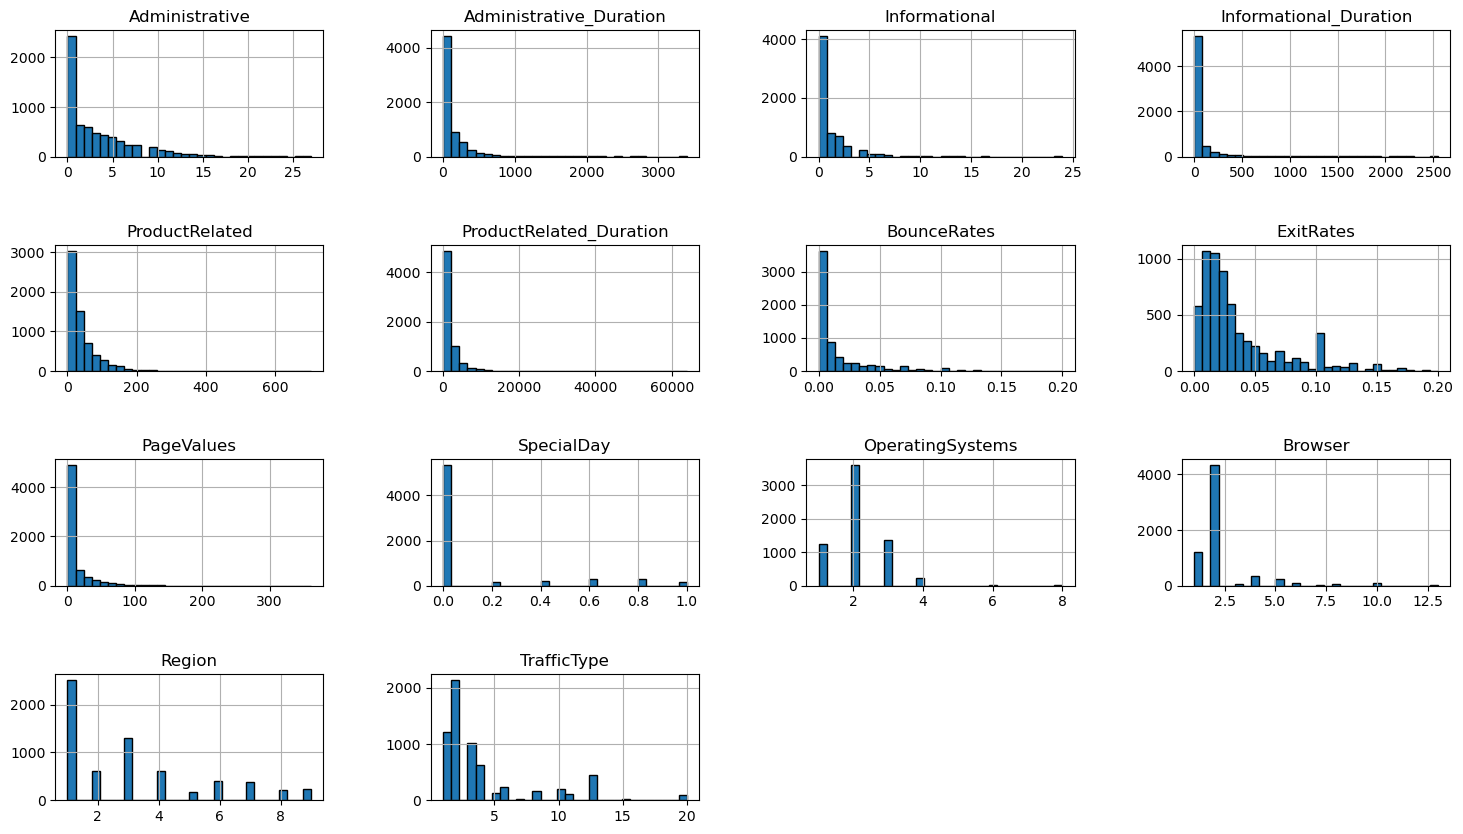

In [13]:
import matplotlib.pyplot as plt
df_outliers.hist(figsize=(18, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [14]:
outlier_desc = df_outliers.describe()
df_wo_outliers = df_encoded_cleaned.drop(outlier_index)
wo_outlier_desc = df_wo_outliers.describe()
result = pd.concat([outlier_desc, wo_outlier_desc], axis=0, keys=['outlier', 'non_outlier'])
result.to_csv('combined_describe_results.csv')
result

Administrative  Administrative_Duration  Informational  \
outlier     count     6466.000000              6466.000000    6466.000000   
            mean         3.203835               124.121570       0.914166   
            std          3.925748               227.549185       1.631921   
            min          0.000000                 0.000000       0.000000   
            25%          0.000000                 0.000000       0.000000   
            50%          2.000000                39.837500       0.000000   
            75%          5.000000               157.252083       1.000000   
            max         27.000000              3398.750000      24.000000   
non_outlier count     4795.000000              4795.000000    4795.000000   
            mean         1.449426                35.042996       0.000000   
            std          2.081690                54.522421       0.000000   
            min          0.000000                 0.000000       0.000000   
            25%          0.000000                 0.000000       0.000000   
            50%          0.000000                 0.000000       0.000000   
            75%          2.000000                55.400000       0.000000   
            max         10.000000               252.500000       0.000000   

                   Informational_Duration  ProductRelated  \
outlier     count             6466.000000     6466.000000   
            mean                65.330176       43.871018   
            std                188.917341       55.686625   
            min                  0.000000        0.000000   
            25%                  0.000000       11.000000   
            50%                  0.000000       25.500000   
            75%                 37.750000       55.000000   
            max               2549.375000      705.000000   
non_outlier count             4795.000000     4795.000000   
            mean                 0.000000       19.389781   
            std                  0.000000       16.338108   
            min                  0.000000        0.000000   
            25%                  0.000000        7.000000   
            50%                  0.000000       14.000000   
            75%                  0.000000       26.000000   
            max                  0.000000       84.000000   

                   ProductRelated_Duration  BounceRates    ExitRates  \
outlier     count              6466.000000  6466.000000  6466.000000   
            mean               1698.882256     0.016132     0.037385   
            std                2419.863476     0.027270     0.036188   
            min                   0.000000     0.000000     0.000000   
            25%                 326.125000     0.000000     0.013333   
            50%                 952.360119     0.004640     0.023442   
            75%                2120.391918     0.018182     0.048425   
            max               63973.522230     0.200000     0.200000   
non_outlier count              4795.000000  4795.000000  4795.000000   
            mean                674.279677     0.005126     0.027686   
            std                 682.154524     0.008306     0.017976   
            min                   0.000000     0.000000     0.000000   
            25%                 187.000000     0.000000     0.013333   
            50%                 437.200000     0.000000     0.024932   
            75%                 918.770833     0.008696     0.040000   
            max                3478.750000     0.033000     0.084375   

                    PageValues   SpecialDay  OperatingSystems      Browser  \
outlier     count  6466.000000  6466.000000       6466.000000  6466.000000   
            mean     10.934129     0.107021          2.125889     2.340860   
            std      24.326332     0.253526          0.846587     1.656726   
            min       0.000000     0.000000          1.000000     1.000000   
            25%       0.000000     0.000000          2.0

/Users/lokwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


False    10135
True      1126
dtype: int64


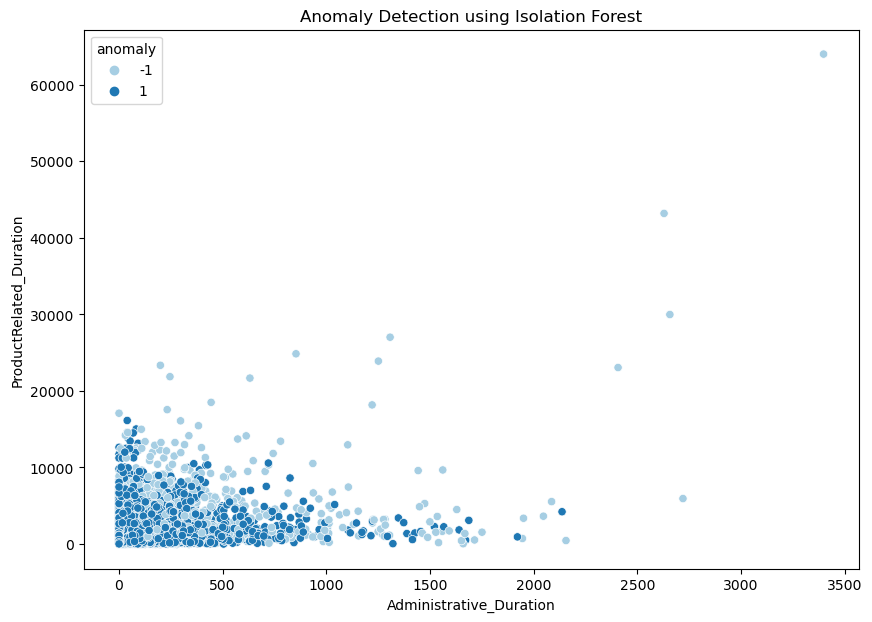

In [15]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# 您提供的数据
# from sklearn.ensemble import IsolationForest

df = df_encoded_cleaned.copy()

# Initialize the IsolationForest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=0)

# Fit the model
iso_forest.fit(df)

# Predictions
outliers_iso = iso_forest.predict(df)

# Outliers will be labeled as -1, inliers as 1. We convert these to boolean for easier interpretation (True for an outlier)
is_outlier = outliers_iso == -1

# Summarize the detected outliers
outlier_summary = pd.Series(is_outlier).value_counts()

print(outlier_summary)

df = df_encoded_cleaned.copy()

# 将预测结果添加到数据框中
df["anomaly"] = outliers_iso

outlier_index_if = df[df["anomaly"] == -1].index

# 显示被检测为异常值的数据点
outliers = df[df["anomaly"] == -1]
# 可视化结果（假设我们仅可视化"Administrative_Duration"和"ProductRelated_Duration"两个特征）
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Administrative_Duration", y="ProductRelated_Duration", hue="anomaly", palette="Paired")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

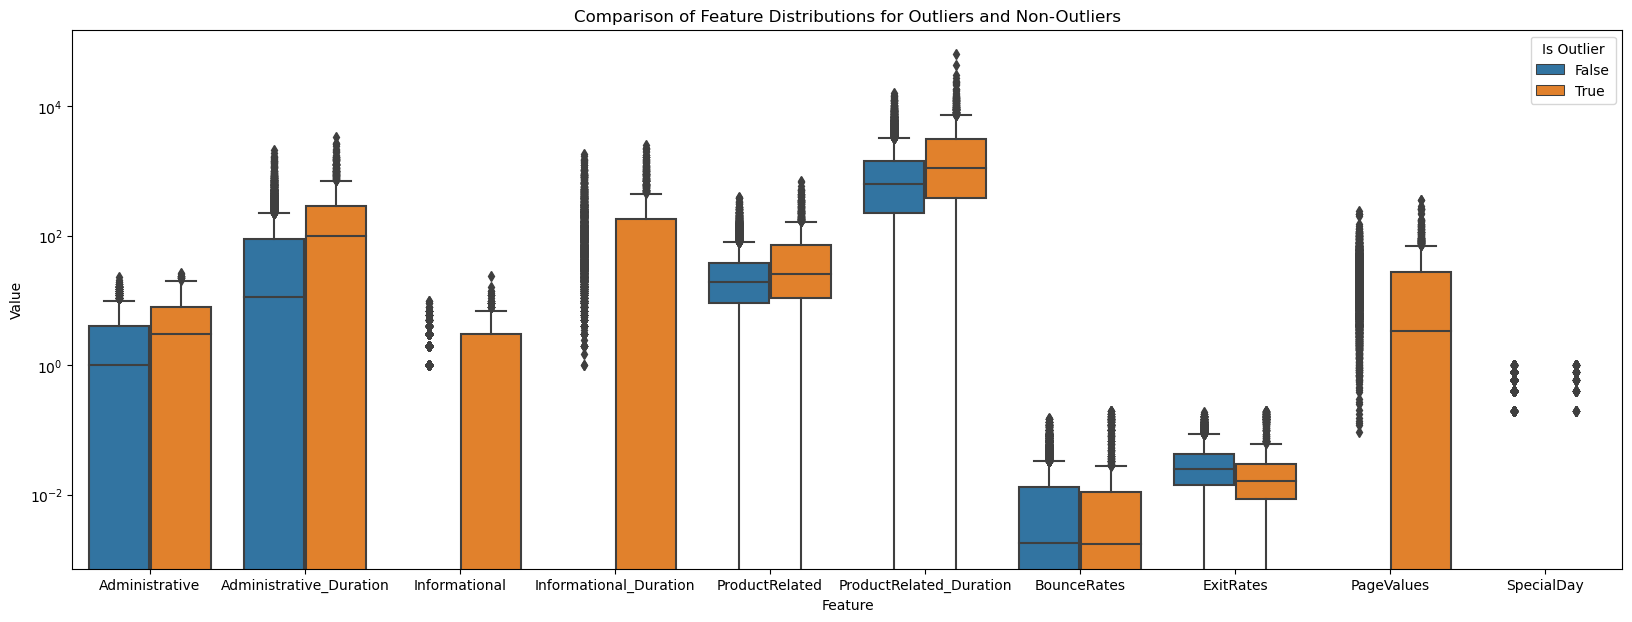

In [16]:
# Convert the outlier predictions to a DataFrame for easier manipulation
outliers_df = pd.DataFrame(is_outlier, columns=['IsOutlier'], index=df.index)

# Merge the outliers DataFrame with the original training data
df_with_outliers = df.merge(outliers_df, left_index=True, right_index=True)

# Select a subset of features to examine
# features_to_examine = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']
features_to_examine = ['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
# Melt the data for easier visualization
melted_data = pd.melt(df_with_outliers, id_vars='IsOutlier', value_vars=features_to_examine, var_name='Feature', value_name='Value')

plt.figure(figsize=(20, 7))
sns.boxplot(data=melted_data, x='Feature', y='Value', hue='IsOutlier')
plt.title('Comparison of Feature Distributions for Outliers and Non-Outliers')
plt.yscale('log')  # Use a log scale for better visibility
plt.legend(title='Is Outlier')
plt.show()


Discover:

The interpretation of these outliers depends on the context. For example, if high PageValues are indeed due to large transactions, these may not be outliers in a business sense, but rather high-value customers. Therefore, it's important to decide whether to treat these points as noise to be removed or as important signals to be included in further analysis or predictive modeling.

“Robust scaling”或者“Robust transformations”在数据预处理中的好处主要体现在对离群值（Outliers）的处理上。这些方法对于包含离群值的数据集特别有用，因为它们减少了离群值对训练模型的影响。

In [17]:
import pandas as pd

# 获取每列的数据类型
column_types = df_encoded_cleaned.dtypes

# 打印每列及其数据类型
print(column_types)

# 找出分类和数值列
categorical_columns = column_types[column_types == 'object'].index.tolist()
numerical_columns = column_types[(column_types == 'int64') | (column_types == 'float64')].index.tolist()

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")


Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month                              int64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
VisitorType_New_Visitor            uint8
VisitorType_Other                  uint8
VisitorType_Returning_Visitor      uint8
dtype: object
Categorical columns: []
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_

In [18]:
def robust_df(df):
    # Selecting numerical features for scaling
    # Assuming that 'Month', 'VisitorType', 'Weekend', and 'Revenue' are categorical (or boolean), we exclude them
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_features.remove('OperatingSystems')
    numerical_features.remove('Browser')
    numerical_features.remove('Region')
    numerical_features.remove('TrafficType')
    numerical_features.remove('Month')
    numerical_features.remove('Revenue')

    # Initialize the RobustScaler
    scaler = RobustScaler()

    # Fit the scaler to the data and transform it
    df_scaled = df.copy()  # Creating a copy to apply transformations
    df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df_scaled
df_scaled = robust_df(df_encoded_cleaned)
df_scaled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,-0.25,-0.165017,0.0,0.0,-0.566667,-0.456045,-0.131579,2.672267,0.000000,0.0,2,2,2,1,2,0.0,0,0,0,1
3,-0.25,-0.165017,0.0,0.0,-0.566667,-0.503005,3.618421,4.076908,0.000000,0.0,2,3,2,2,4,0.0,0,0,0,1
4,-0.25,-0.165017,0.0,0.0,-0.300000,-0.024605,1.368421,0.916464,0.000000,0.0,2,3,3,1,4,1.0,0,0,0,1
5,-0.25,-0.165017,0.0,0.0,0.000000,-0.386971,1.052632,0.023162,0.000000,0.0,2,2,2,1,3,0.0,0,0,0,1
8,-0.25,-0.165017,0.0,0.0,-0.566667,-0.476718,-0.131579,2.672267,0.000000,0.8,2,2,2,2,3,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.50,1.270627,0.0,0.0,1.133333,0.860703,0.404135,0.180102,12.241717,0.0,12,4,6,1,1,1.0,0,0,0,1
12326,-0.25,-0.165017,0.0,0.0,-0.466667,-0.148448,-0.131579,-0.090196,0.000000,0.0,11,3,2,1,8,1.0,0,0,0,1
12327,-0.25,-0.165017,0.0,0.0,-0.433333,-0.363977,6.118421,2.204053,0.000000,0.0,11,3,2,1,13,1.0,0,0,0,1
12328,0.75,0.577558,0.0,0.0,-0.133333,-0.240134,-0.131579,-0.100053,0.000000,0.0,11,2,2,3,11,0.0,0,0,0,1


# Detail for Month vs Revenue

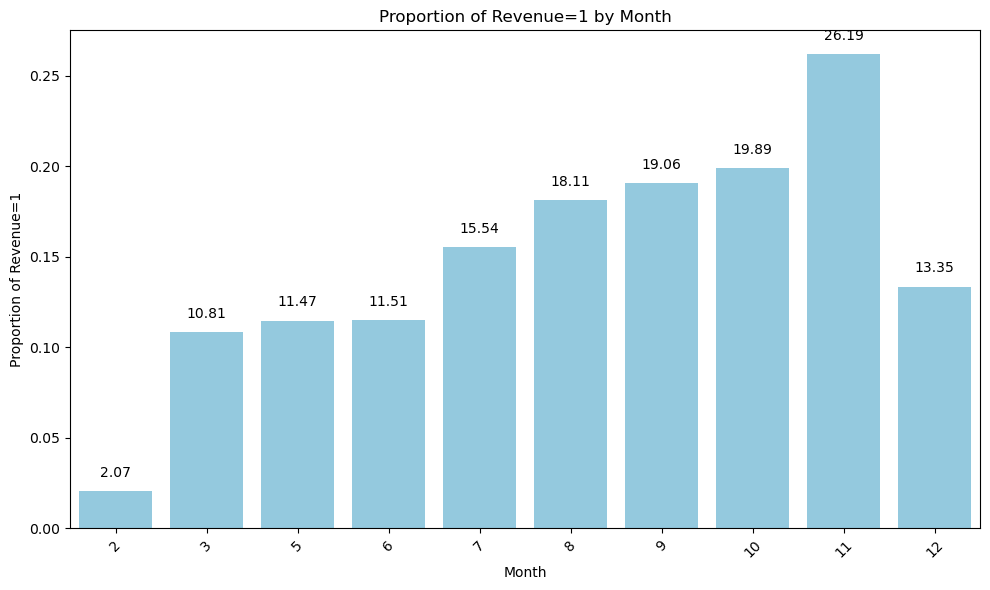

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每月的Revenue为1的比例
revenue_proportion = df_encoded_cleaned.groupby('Month')['Revenue'].mean()

# 生成条形图
plt.figure(figsize=(10,6))
ax = sns.barplot(x=revenue_proportion.index, y=revenue_proportion.values, color='skyblue')
# 在每个条形上方标注具体的值
for i, v in enumerate(revenue_proportion.values):
    ax.annotate(format(v*100, '.2f'), 
                (i, v + 0.01), 
                ha='center', va='center',
                fontsize=10, color='black')
plt.title('Proportion of Revenue=1 by Month')
plt.ylabel('Proportion of Revenue=1')
plt.xlabel('Month')
plt.xticks(rotation=45)  # 如果月份名称很长，可以旋转x轴标签
plt.tight_layout()
plt.show()

# Feature Engneering

In [20]:
def add_browsingdepth(df):
    df_enriched = df.copy()
    page = ['Administrative','Informational','ProductRelated']
    for i in range(3):
        df_enriched[f'{page[i]}_Browsingdepth'] = df_enriched[f'{page[i]}'] / df_enriched[f'{page[i]}_Duration']
        df_enriched[f'{page[i]}_Browsingdepth'].fillna(0,inplace=True)

    # bring target value to the last column
    target = df_enriched['Revenue']
    df_enriched.drop(columns=['Revenue'], inplace=True)
    df_enriched['Revenue'] = target
    return df_enriched
df_enriched = add_browsingdepth(df_scaled)
df_enriched

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Administrative_Browsingdepth,Informational_Browsingdepth,ProductRelated_Browsingdepth,Revenue
1,-0.25,-0.165017,0.0,0.0,-0.566667,-0.456045,-0.131579,2.672267,0.000000,0.0,...,1,2,0.0,0,0,1,1.515000,0.0,1.242567,0
3,-0.25,-0.165017,0.0,0.0,-0.566667,-0.503005,3.618421,4.076908,0.000000,0.0,...,2,4,0.0,0,0,1,1.515000,0.0,1.126563,0
4,-0.25,-0.165017,0.0,0.0,-0.300000,-0.024605,1.368421,0.916464,0.000000,0.0,...,1,4,1.0,0,0,1,1.515000,0.0,12.192732,0
5,-0.25,-0.165017,0.0,0.0,0.000000,-0.386971,1.052632,0.023162,0.000000,0.0,...,1,3,0.0,0,0,1,1.515000,0.0,-0.000000,0
8,-0.25,-0.165017,0.0,0.0,-0.566667,-0.476718,-0.131579,2.672267,0.000000,0.8,...,2,3,0.0,0,0,1,1.515000,0.0,1.188684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.50,1.270627,0.0,0.0,1.133333,0.860703,0.404135,0.180102,12.241717,0.0,...,1,1,1.0,0,0,1,0.393506,0.0,1.316753,0
12326,-0.25,-0.165017,0.0,0.0,-0.466667,-0.148448,-0.131579,-0.090196,0.000000,0.0,...,1,8,1.0,0,0,1,1.515000,0.0,3.143643,0
12327,-0.25,-0.165017,0.0,0.0,-0.433333,-0.363977,6.118421,2.204053,0.000000,0.0,...,1,13,1.0,0,0,1,1.515000,0.0,1.190553,0
12328,0.75,0.577558,0.0,0.0,-0.133333,-0.240134,-0.131579,-0.100053,0.000000,0.0,...,3,11,0.0,0,0,1,1.298571,0.0,0.555246,0


In [21]:
# create new columns
df_enriched = df_encoded_cleaned.copy()

page = ['Administrative','Informational','ProductRelated']
for i in range(3):
    df_enriched[f'{page[i]}_Browsingdepth'] = df_enriched[f'{page[i]}'] / df_enriched[f'{page[i]}_Duration']
    df_enriched[f'{page[i]}_Browsingdepth'].fillna(0,inplace=True)

# bring target value to the last column
target = df_enriched['Revenue']
df_enriched.drop(columns=['Revenue'], inplace=True)
df_enriched['Revenue'] = target

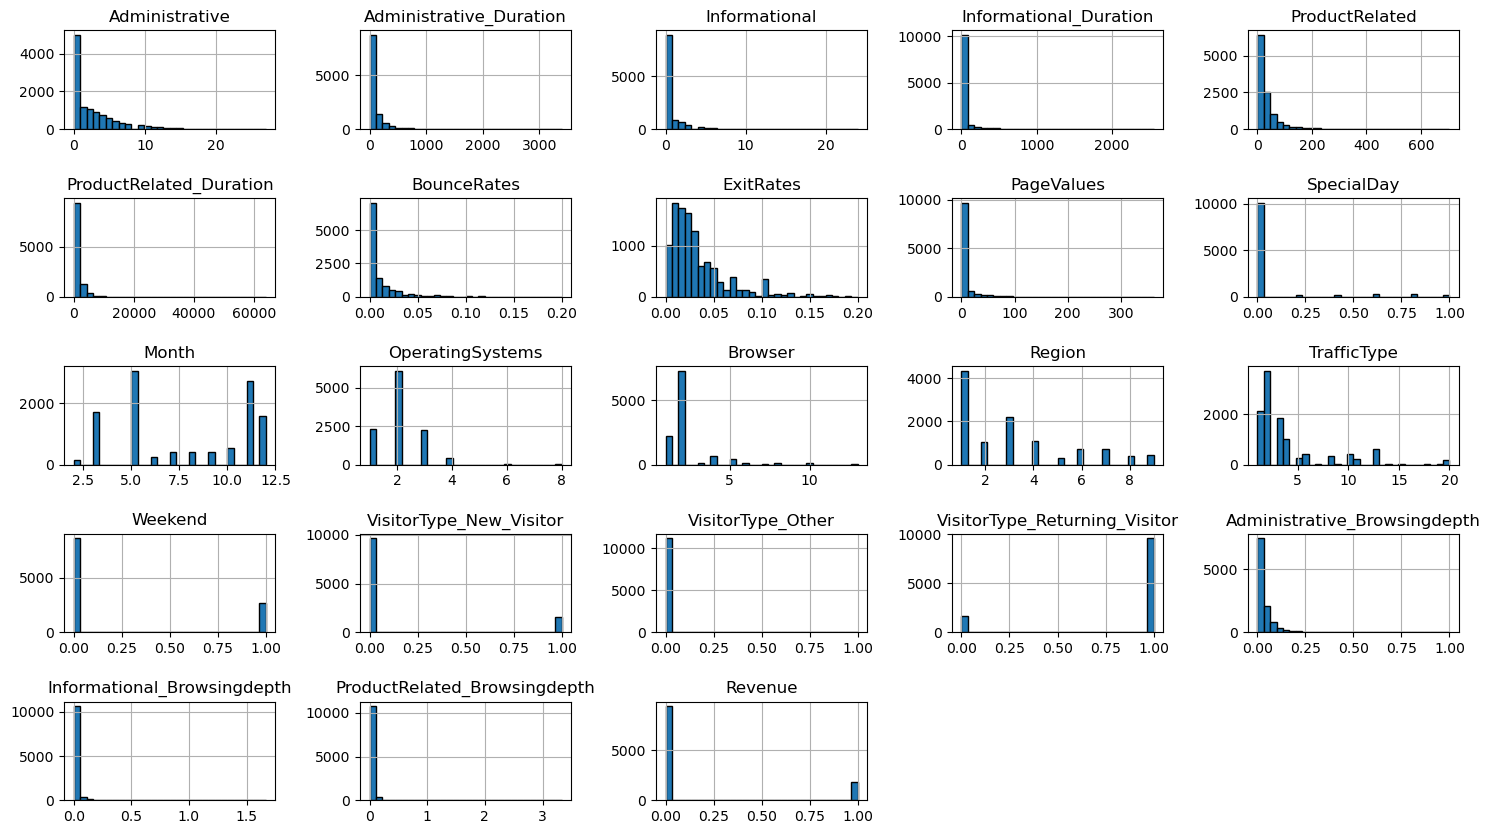

In [22]:
import matplotlib.pyplot as plt
df_enriched.hist(figsize=(18, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [23]:
df_enriched.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Administrative_Browsingdepth',
       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth',
       'Revenue'],
      dtype='object')

In [24]:
Ordinal_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Administrative_Browsingdepth',
       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth']

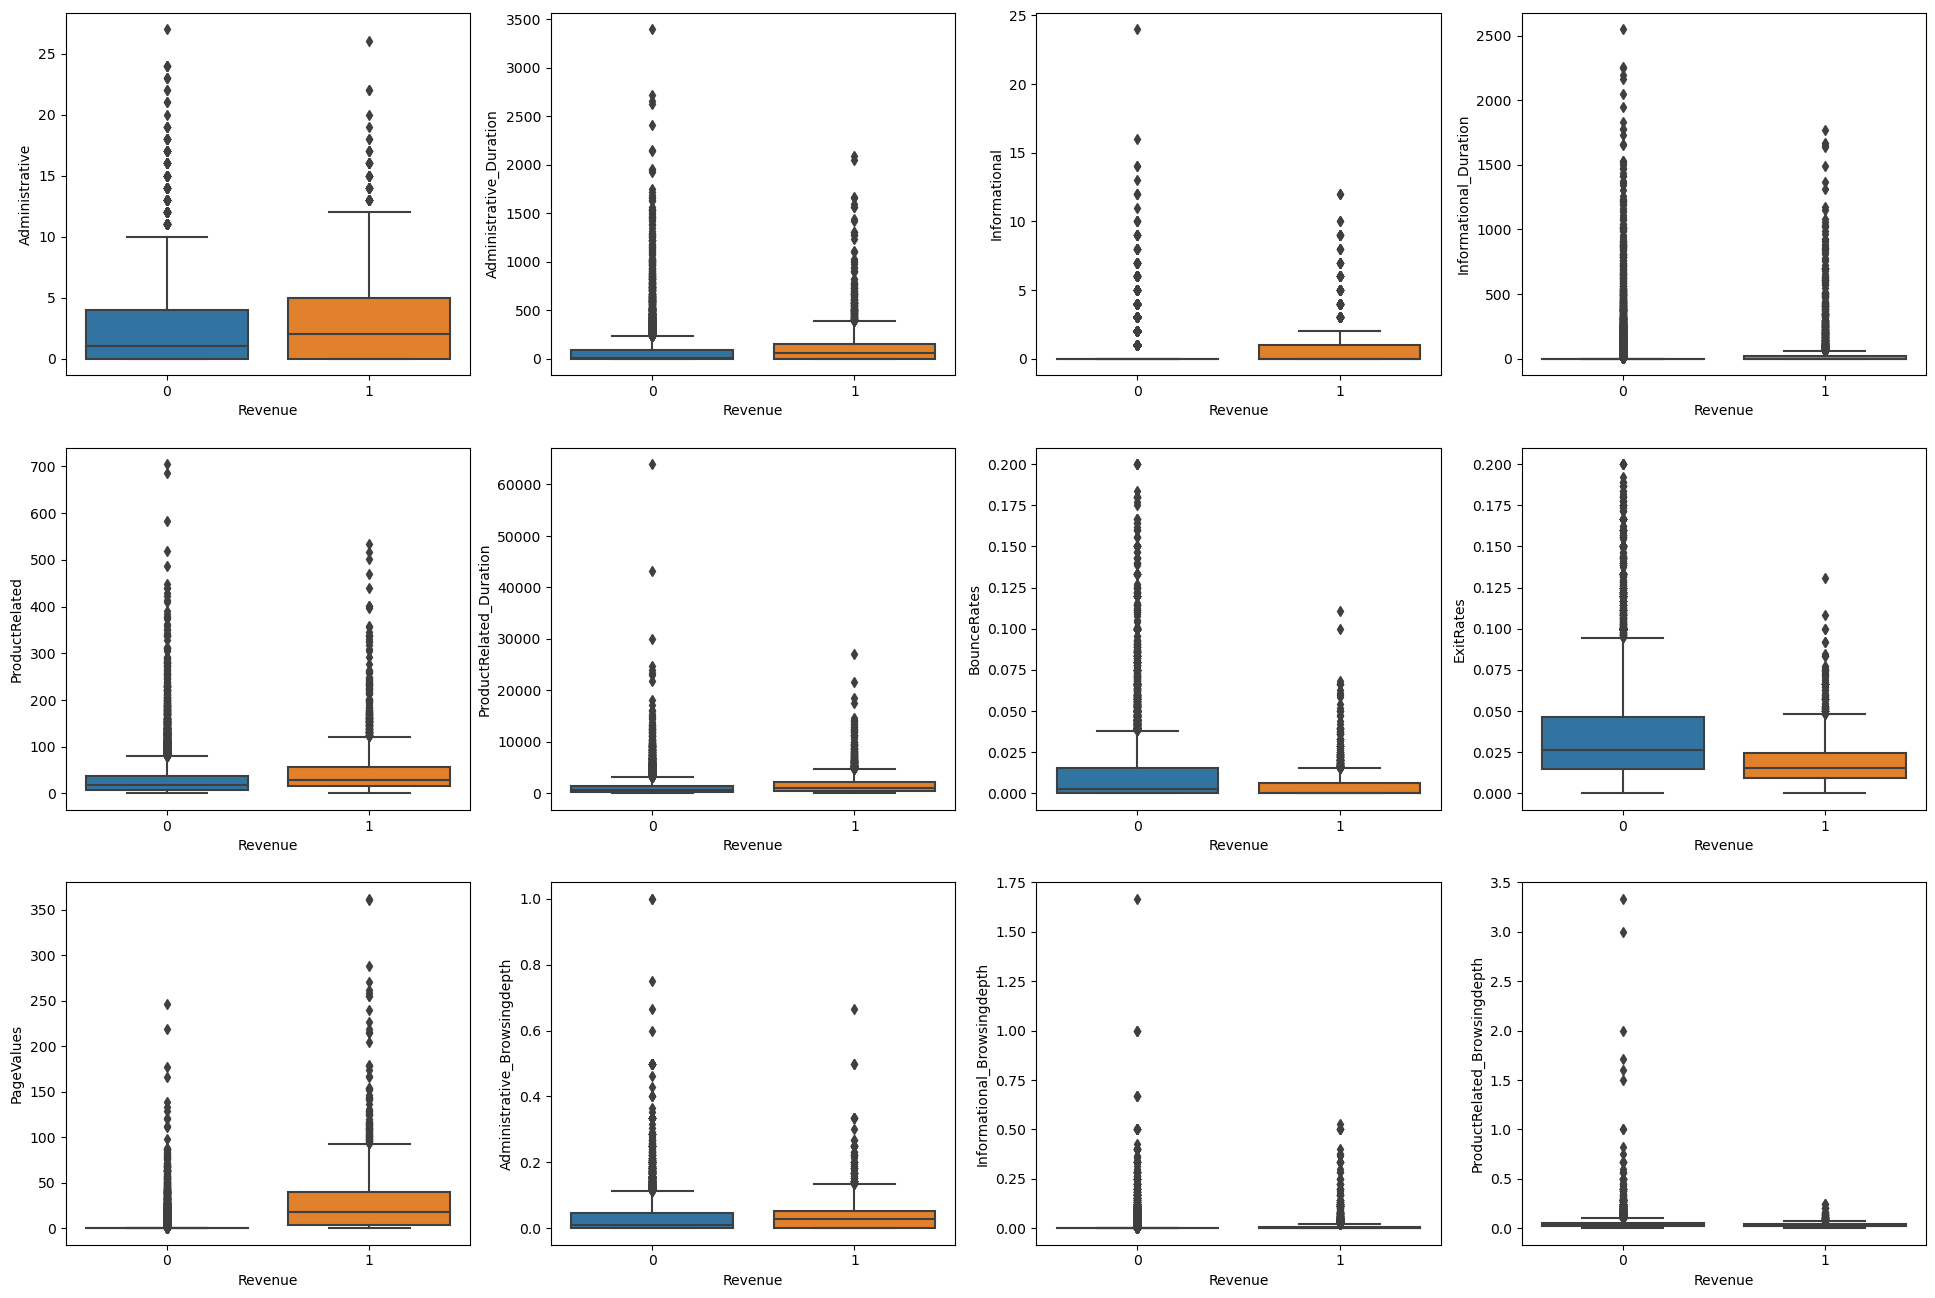

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 16))

# 遍历每个图，绘制箱形图
for i, column in enumerate(Ordinal_columns):
    row = i // 4  # 计算行索引
    col = i % 4   # 计算列索引
    sns.boxplot(x='Revenue', y=column, data=df_enriched, ax=axes[row, col])

plt.show()

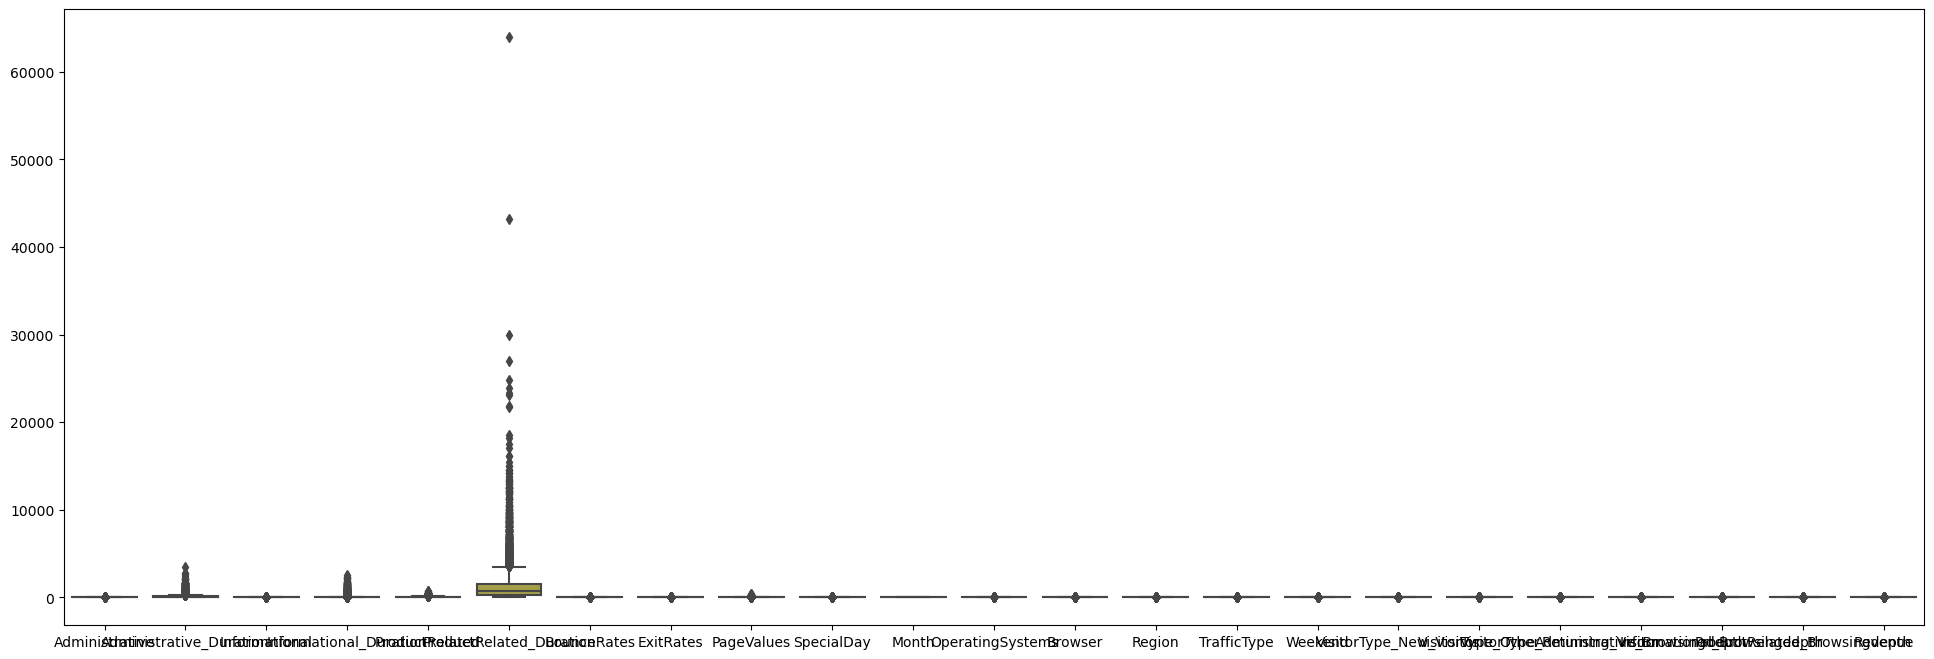

In [26]:
plt.figure(figsize=(24,8))
sns.boxplot(data=df_enriched)
plt.show()

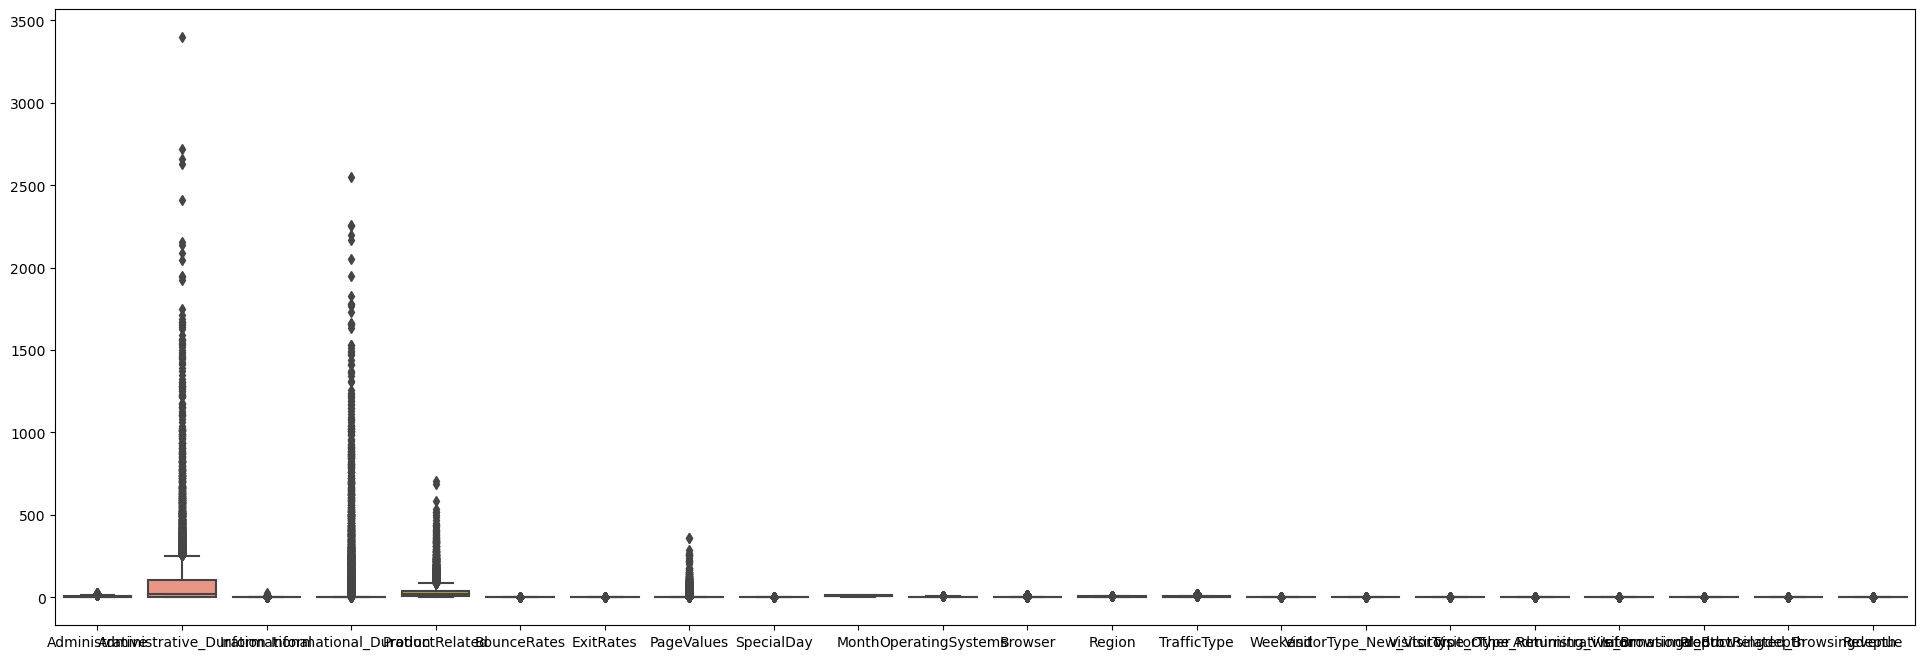

In [27]:
plt.figure(figsize=(24,8))
sns.boxplot(data=df_enriched.drop(columns="ProductRelated_Duration"))
plt.show()

# Heat Map

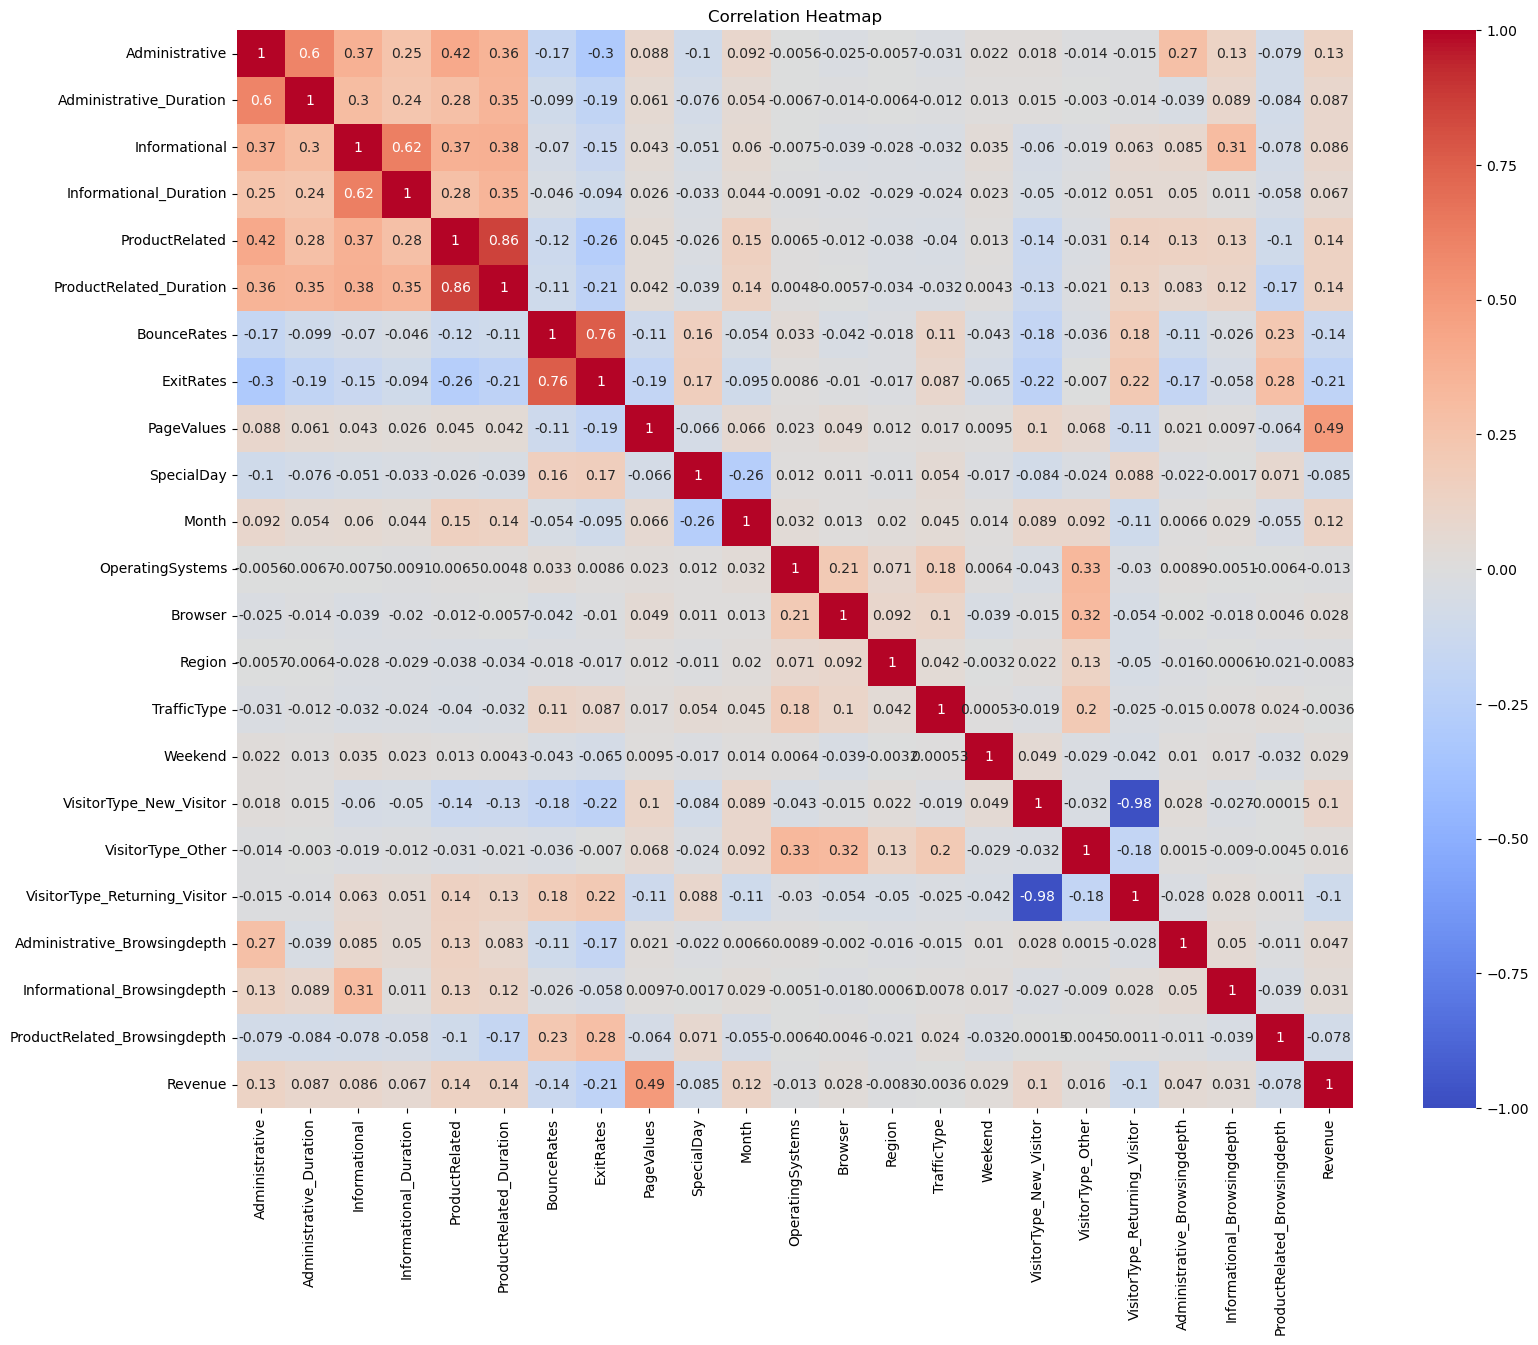

In [28]:
def heat_map(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(18, 14))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.show()
heat_map(df_enriched)

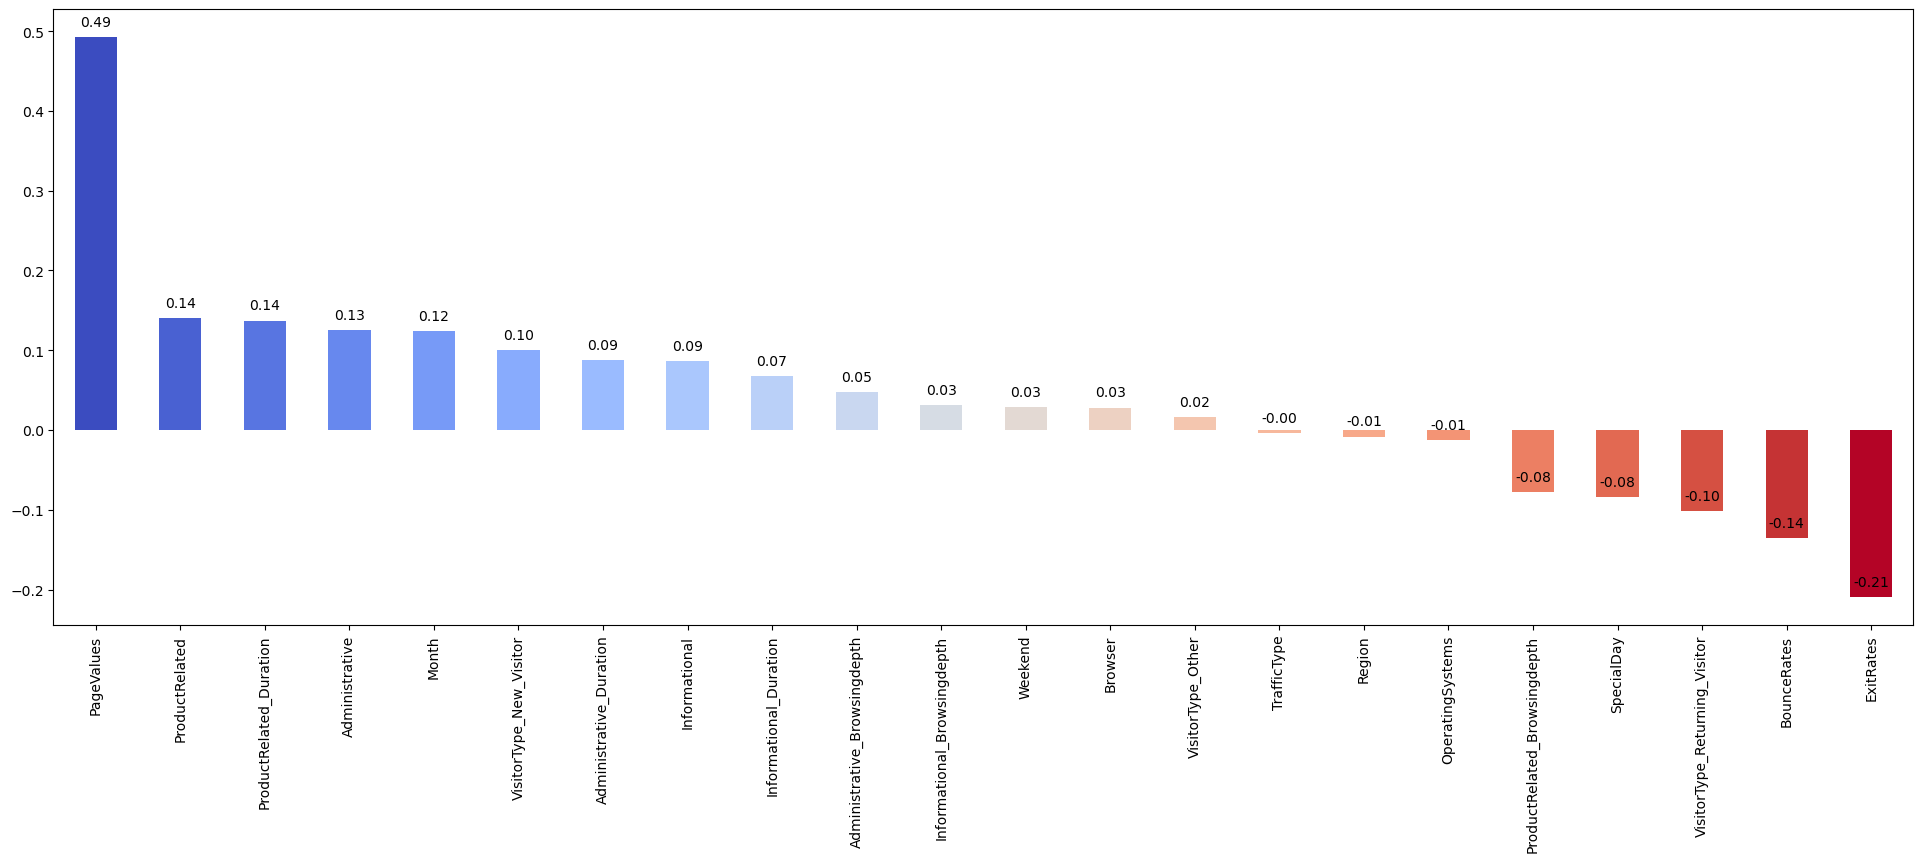

In [29]:
plt.figure(figsize=(24,8))
correlations = df_enriched.drop(columns="Revenue").corrwith(df_enriched['Revenue']).sort_values(ascending=False)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(x) for x in np.linspace(0, 1, len(correlations))]
bars = correlations.plot(kind='bar', color = colors)
# 标记correlation值
for i, v in enumerate(correlations):
    bars.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# Pre-process the data (normalizing & standardizing) & Log Transformation

In [30]:
# pre_process
def pre_process(df, method, feature_list):
    """
    pre-process the data frame

    param df: The data frame need to be pre-processed
    param method: 'normalizing' or 'standardizing'
    param feature_list: feature list of the data frame
    """ 
    scaler = None
    if method == 'normalizing':
        scaler = MinMaxScaler()
    elif method == 'standardizing':
        scaler = StandardScaler()
    if scaler:
        df[feature_list] = scaler.fit_transform(df[feature_list])
    else:
        print("Wrong Method Name")

def log_transform(df, columns, base=np.e, add_constant=1):
    transformed_df = df.copy()
    for col in columns:
        transformed_df[col] = np.log(transformed_df[col] + add_constant) / np.log(base)
    return transformed_df
# Example usage
# Ordinal_columns = ['Administrative', 'Administrative_Duration', 'Informational',
#       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#       'BounceRates', 'ExitRates', 'PageValues', 'Administrative_Browsingdepth',
#       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth']
# df_norm = pre_process(df_original, 'normalizing', Ordinal_columns)
# df_std = pre_process(df_original, 'standardizing', Ordinal_columns)
# df_log = log_transform(df_original, Ordinal_columns)

# ANOVA Table

In [31]:
def generate_anova_table(df):
    """
    Generate an ANOVA table.

    Parameters:
    - df: DataFrame containing the data

    Returns:
    - ANOVA table as a DataFrame
    """
    feature_names = df.columns.tolist()
    target_vari_name = feature_names[-1]
    formula = target_vari_name + ' ~ '
    for feat_name in feature_names[:-1]:
        formula += feat_name + ' + '
    formula = formula[:-3]
    # Fit the model
    model = ols(formula, data=df).fit()
    
    # ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table = anova_table.round(3)    
    def color_significant_pvalues(val):
        """
        Colors the p-values that are below 0.05.
        """
        color = 'red' if (isinstance(val, float) and val < 0.05) else 'black'
        return f'color: {color}'

    styled_table = anova_table.style.applymap(color_significant_pvalues, subset=['PR(>F)'])
    return styled_table
anova_table = generate_anova_table(df_enriched)
anova_table

,sum_sq,df,F,PR(>F)
Administrative,0.108000,1.000000,1.097000,0.295000
Administrative_Duration,0.007000,1.000000,0.066000,0.797000
Informational,0.021000,1.000000,0.218000,0.641000
Informational_Duration,0.084000,1.000000,0.856000,0.355000
ProductRelated,0.359000,1.000000,3.646000,0.056000
ProductRelated_Duration,1.151000,1.000000,11.689000,0.001000
BounceRates,0.044000,1.000000,0.442000,0.506000
ExitRates,3.467000,1.000000,35.216000,0.000000
PageValues,311.052000,1.000000,3159.130000,0.000000
SpecialDay,0.362000,1.000000,3.676000,0.055000


# Using KNN group user

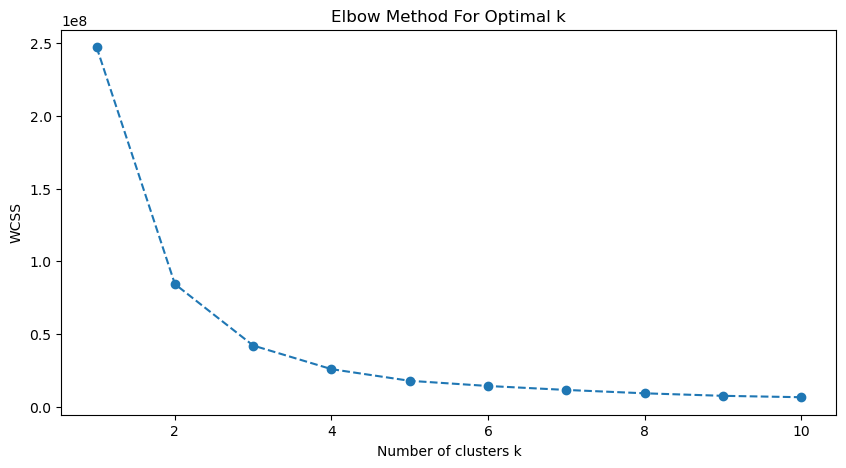

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Re-importing necessary libraries as the state was reset
import pandas as pd
import numpy as np

# Re-load the revised dataset since the state was reset
df_knn = df_original.copy()
df_knn = encode_df(df_knn)
df_knn = remove_abnormal_rows(df_knn)
df_knn = add_browsingdepth(df_knn)
df_knn = robust_df(df_knn)
df_final_revised = df_knn.copy()

# Function to calculate KMeans for a range of k values
def calculate_wcss(data, k_max):
    wcss = []
    for n in range(1, k_max+1):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Define a range for k (from 1 to 10)
k_range = 10

# Calculate WCSS for each k
wcss = calculate_wcss(df_final_revised, k_range)

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, k_range+1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.show()


从图中可以观察到：

当簇的数量从1增加到2时，WCSS值急剧下降。
随着簇数量的进一步增加，WCSS的下降速度变缓，曲线的斜率减小。
在 k=3 或 k=4 附近，下降趋势开始变得平缓，曲线呈现出一个肘部的样子。
在 k 大于4之后，WCSS的减少量变得不再显著，这意味着增加更多的簇不会显著提高模型的性能。
基于这张图，我们可能会选择 k=3 或 k=4 作为簇的数量。肘部法则的核心思想是找到WCSS下降趋势变缓的点，因为在这一点之后增加更多的簇不会带来太大的收益。在实际应用中，除了WCSS，还需要考虑其他因素，如簇的解释性、业务需求等，来确定最终的簇数。

In [33]:
def classify_user(df):
    df_classify = df.copy()
    # Initialize KMeans with 3 clusters
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

    # Fit the data and predict the cluster assignments for each data point
    df_classify['Cluster'] = kmeans.fit_predict(df_classify.drop('Revenue', axis=1))  # Drop 'Revenue' if it's the label
    return df_classify

In [34]:
from sklearn.cluster import KMeans

df_final_new = df_knn.copy()
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the data and predict the cluster assignments for each data point
df_final_new['Cluster'] = kmeans.fit_predict(df_final_new.drop('Revenue', axis=1))  # Drop 'Revenue' if it's the label

# Output the cluster centers and the first few cluster assignments
cluster_centers = kmeans.cluster_centers_
cluster_assignments = df_final_new['Cluster'].head()
df_final_new['Cluster'].value_counts()

0    10597
1      548
2      116
Name: Cluster, dtype: int64

/Users/lokwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


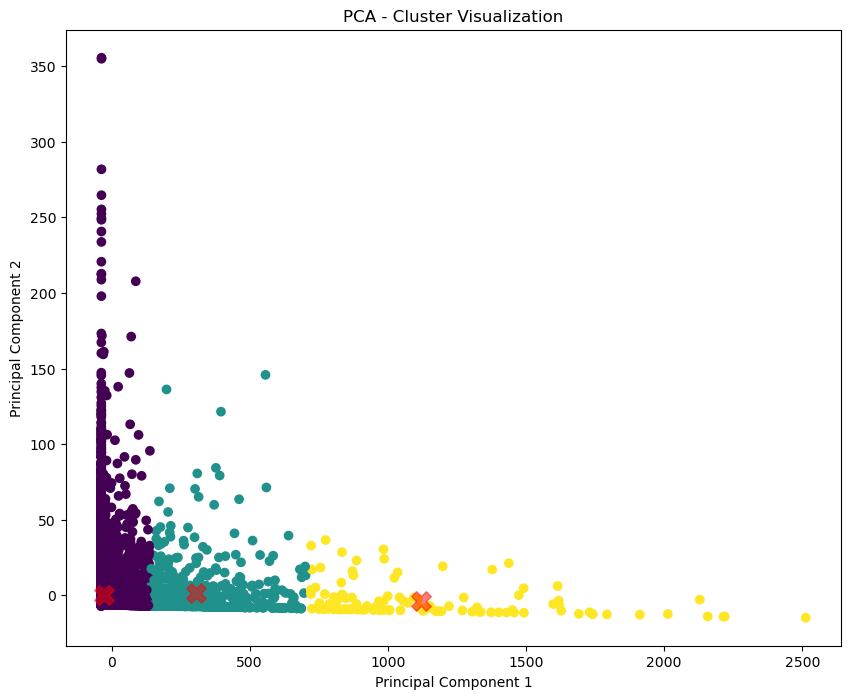

In [35]:
# Re-importing matplotlib for plotting
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the data minus the 'Revenue' and 'Cluster' columns to reduce it to two dimensions
pca_result = pca.fit_transform(df_final_new.drop(['Revenue', 'Cluster'], axis=1))

# Create a scatter plot of the PCA results, color-coded by cluster assignment
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_final_new['Cluster'], cmap='viridis', marker='o')
plt.title('PCA - Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate the cluster centers on PCA reduced dimensions
centers_reduced = pca.transform(cluster_centers)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.5, marker='X')

# Show the plot
plt.show()

# Modelling

In [36]:
df_final = df_original.copy()
# encode
df_final = encode_df(df_final)
# remove abnormal rows
df_final = remove_abnormal_rows(df_final)
# add browsingdepth
df_final = add_browsingdepth(df_final)
# for outliers robust scaler
df_final = robust_df(df_final)
# add additional feature that group users
df_final = classify_user(df_final)
# 假设df是你的DataFrame变量
# df_final.to_csv('online_shopper_preprocessed_data.csv', index=False)
# print(df_final.shape)
# print(np.isinf(df_final).values.any())
df_final

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Administrative_Browsingdepth,Informational_Browsingdepth,ProductRelated_Browsingdepth,Revenue,Cluster
1,-0.25,-0.165017,0.0,0.0,-0.566667,-0.456045,-0.131579,2.672267,0.000000,0.0,...,2,0.0,0,0,1,-0.272048,0.0,-0.059625,0,0
3,-0.25,-0.165017,0.0,0.0,-0.566667,-0.503005,3.618421,4.076908,0.000000,0.0,...,4,0.0,0,0,1,-0.272048,0.0,24.167958,0,0
4,-0.25,-0.165017,0.0,0.0,-0.300000,-0.024605,1.368421,0.916464,0.000000,0.0,...,4,1.0,0,0,1,-0.272048,0.0,-0.575820,0,0
5,-0.25,-0.165017,0.0,0.0,0.000000,-0.386971,1.052632,0.023162,0.000000,0.0,...,3,0.0,0,0,1,-0.272048,0.0,3.039931,0,0
8,-0.25,-0.165017,0.0,0.0,-0.566667,-0.476718,-0.131579,2.672267,0.000000,0.8,...,3,0.0,0,0,1,-0.272048,0.0,0.709053,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.50,1.270627,0.0,0.0,1.133333,0.860703,0.404135,0.180102,12.241717,0.0,...,1,1.0,0,0,1,0.166573,0.0,-0.111468,0,0
12326,-0.25,-0.165017,0.0,0.0,-0.466667,-0.148448,-0.131579,-0.090196,0.000000,0.0,...,8,1.0,0,0,1,-0.272048,0.0,-0.751131,0,0
12327,-0.25,-0.165017,0.0,0.0,-0.433333,-0.363977,6.118421,2.204053,0.000000,0.0,...,13,1.0,0,0,1,-0.272048,0.0,-0.015317,0,0
12328,0.75,0.577558,0.0,0.0,-0.133333,-0.240134,-0.131579,-0.100053,0.000000,0.0,...,11,0.0,0,0,1,0.858619,0.0,0.348329,0,0


In [37]:
#df_final = df_enriched.copy()

In [38]:
df_final['Revenue'].value_counts()

0    9441
1    1820
Name: Revenue, dtype: int64

Deal with unbalanced data

In [39]:
X = df_final.drop('Revenue', axis=1) 
y = df_final['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

print(X_train.shape)
print(X_test.shape)

(9008, 23)
(2253, 23)


In [40]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
print('Accuracy for model1 lr is ',metrics.accuracy_score(prediction1,y_test))
print('precision',precision_score(y_test, prediction1, average='binary'))
print('recall',recall_score(y_test, prediction1, average='binary'))
print('f1_score',f1_score(y_test, prediction1, average='binary'))
print('\n')

model2 = LogisticRegression(class_weight='balanced') #Assign weights to different categories
model2.fit(X_train,y_train)
prediction2=model2.predict(X_test)
print('Accuracy for model2 lr is ',metrics.accuracy_score(prediction2,y_test))
print('precision',precision_score(y_test, prediction2, average='binary'))
print('recall',recall_score(y_test, prediction2, average='binary'))
print('f1_score',f1_score(y_test, prediction2, average='binary'))

Accuracy for model1 lr is  0.8823790501553485
precision 0.7540106951871658
recall 0.39166666666666666
f1_score 0.5155393053016454


Accuracy for model2 lr is  0.8521970705725699
precision 0.5270541082164328
recall 0.7305555555555555
f1_score 0.6123399301513387


/Users/lokwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lokwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

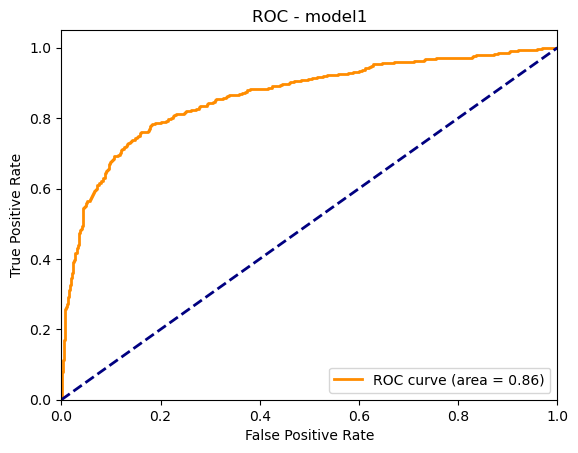

In [41]:
y_score = model1.predict_proba(X_test)[:, 1]

# 计算ROC曲线的相关指标
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - model1')
plt.legend(loc="lower right")
plt.show()

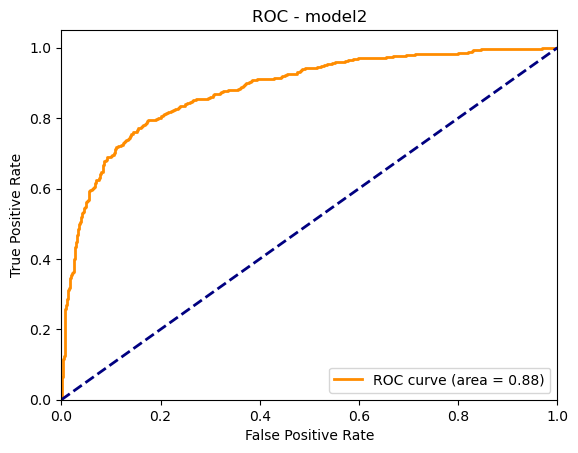

In [42]:
y_score = model2.predict_proba(X_test)[:, 1]

# 计算ROC曲线的相关指标
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - model2')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Randomforest
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)

In [44]:
print('Accuracy for model rf is ',metrics.accuracy_score(prediction_rf,y_test))
print('precision',precision_score(y_test, prediction_rf, average='binary'))
print('recall',recall_score(y_test, prediction_rf, average='binary'))
print('f1_score',f1_score(y_test, prediction_rf, average='binary'))

Accuracy for model rf is  0.8934753661784287
precision 0.7158273381294964
recall 0.5527777777777778
f1_score 0.6238244514106583


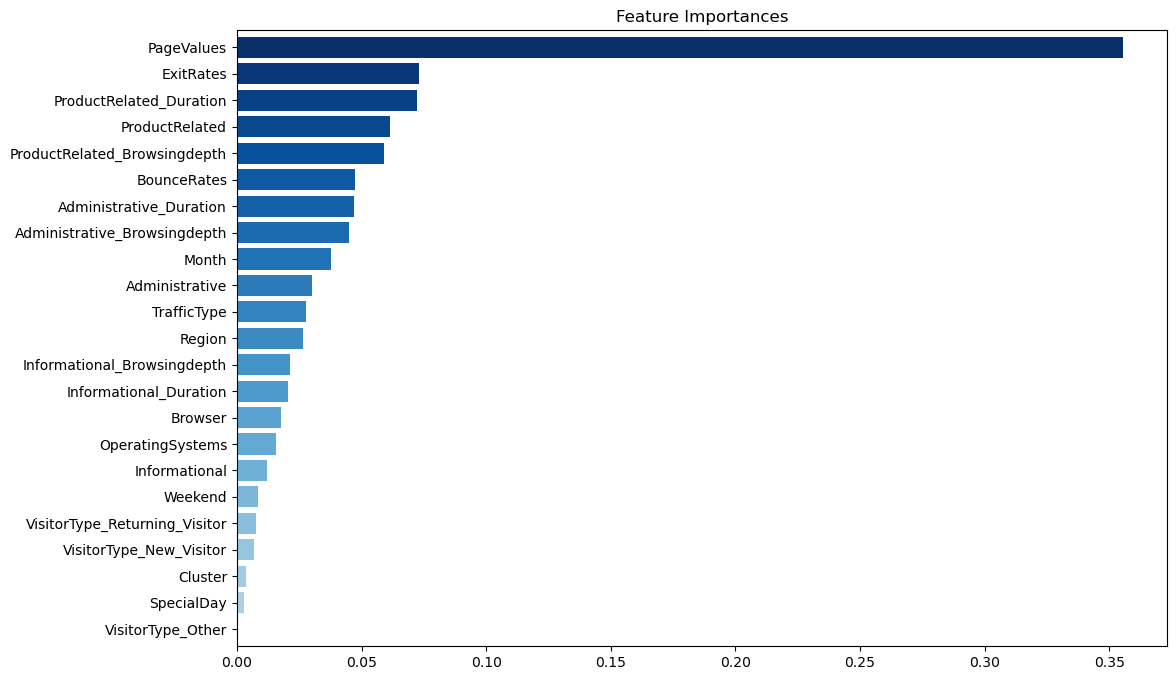

In [45]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_importances)))

plt.figure(figsize= (12,8))
sorted_importances.plot(kind='barh', width=0.8, color=colors)
plt.title("Feature Importances")
plt.show()